In [ ]:
import torch
cpu_tensor = torch.zeros(2, 3)
device = torch.device("cuda:0")
gpu_tensor = cpu_tensor.to(device)
print(gpu_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [ ]:
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x ** 2
z = 2 * y + 3

target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  if __name__ == '__main__':


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [ ]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)
noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
y = 2 * x + 3
y_noise = y + noise


In [ ]:
model = nn.Linear(1, 1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
label = y_noise
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    print(loss.data)

param_list = list(model.parameters())
print(param_list[0].item(), param_list[1].item())


tensor(0.7891)
tensor(0.7888)
tensor(0.7886)
tensor(0.7884)
tensor(0.7882)
tensor(0.7881)
tensor(0.7879)
tensor(0.7878)
tensor(0.7877)
tensor(0.7876)
tensor(0.7876)
tensor(0.7875)
tensor(0.7874)
tensor(0.7873)
tensor(0.7873)
tensor(0.7872)
tensor(0.7871)
tensor(0.7871)
tensor(0.7871)
tensor(0.7870)
tensor(0.7870)
tensor(0.7870)
tensor(0.7870)
tensor(0.7870)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
tensor(0.7869)
2.005122661590576 2.9572949409484863


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x ** 2) + 3
y_noise = y + noise

model = nn.Sequential(
    nn.Linear(1, 6),
    nn.ReLU(),
    nn.Linear(6, 10),
    nn.ReLU(),
    nn.Linear(10, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

loss_array = list()
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss)

# 새 섹션

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

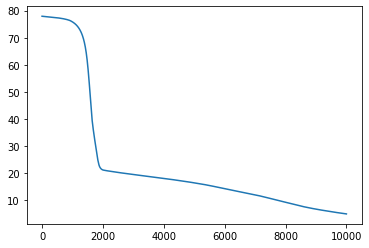

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()